In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.datasets import load_iris
import requests
import seaborn as sns
import scipy.stats as stats

In [3]:
# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

# Download the CSV file
response = requests.get(url)
csv_content = response.content

# Save the downloaded CSV content to a local file
with open('downloaded_data.csv', 'wb') as file:
    file.write(csv_content)

# Load the CSV content into a DataFrame
df = pd.read_csv('downloaded_data.csv')

# Save the DataFrame to a local CSV file
df.to_csv('local_data.csv', index=False)

print("CSV downloaded, loaded into a DataFrame, and saved as 'local_data.csv'.")

CSV downloaded, loaded into a DataFrame, and saved as 'local_data.csv'.


In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


EDA the data to understand the data more and know the relation between each other 

In [5]:
# summarize the numerical data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
df[['VEHICLECLASS' , 'MAKE' ,'MODEL']].value_counts()

VEHICLECLASS             MAKE           MODEL                           
PICKUP TRUCK - STANDARD  FORD           F150 FFV                            8
                                        F150 FFV 4X4                        8
COMPACT                  VOLKSWAGEN     BEETLE                              6
MID-SIZE                 HONDA          ACCORD                              6
COMPACT                  FORD           FOCUS FFV                           6
                                                                           ..
MID-SIZE                 BENTLEY        FLYING SPUR                         1
SUBCOMPACT               BMW            650i xDRIVE CABRIOLET               1
MID-SIZE                 BENTLEY        MULSANNE                            1
SUBCOMPACT               BENTLEY        CONTINENTAL GT SPEED CONVERTIBLE    1
COMPACT                  MERCEDES-BENZ  C 350                               1
Name: count, Length: 663, dtype: int64

visaualize the data 

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

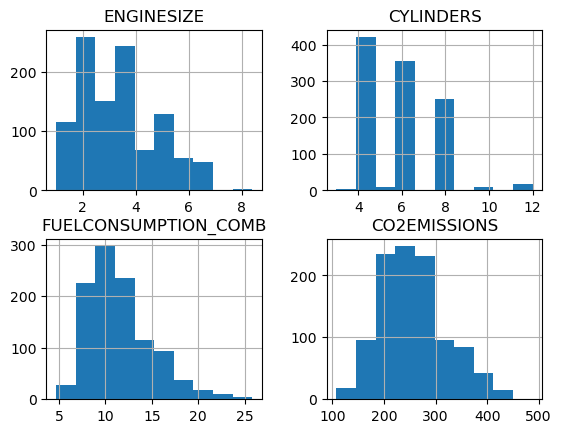

In [ ]:
#visaualize the data
viz = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist( )

<Axes: >

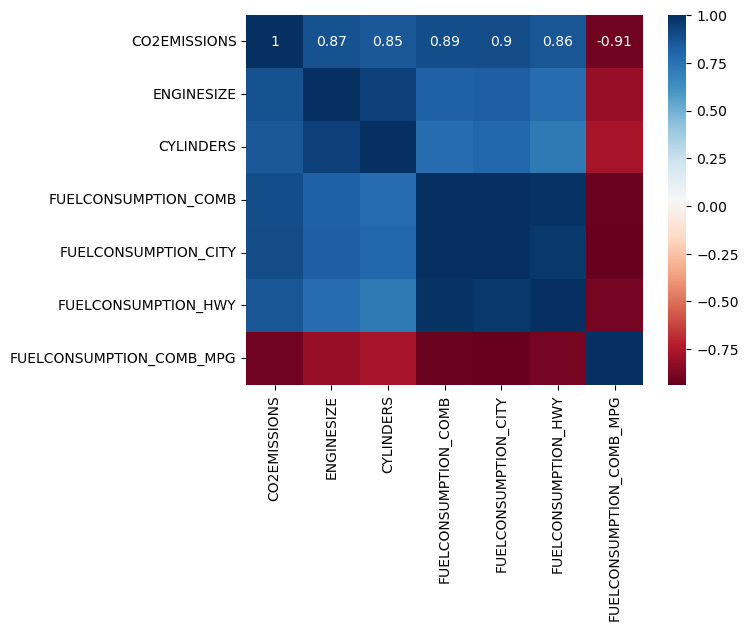

In [ ]:
#heatmap all the data to see the correlation between the features
sns.heatmap(df[['CO2EMISSIONS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB' , 'FUELCONSUMPTION_CITY' ,'FUELCONSUMPTION_HWY'  ,'FUELCONSUMPTION_COMB_MPG'  ]].corr(), annot=True , cmap='RdBu')

 see the relationship between engine size and co2 emissions  and visualize it

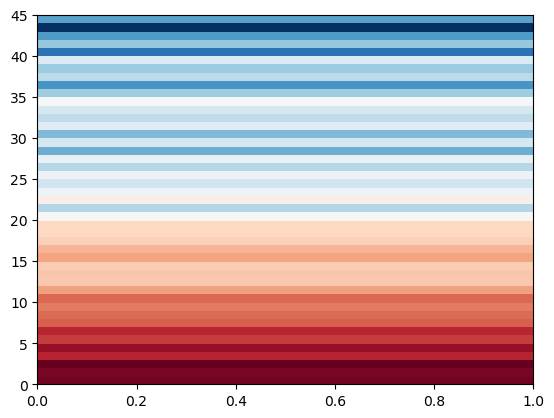

In [ ]:
# see the relationship between engine size and co2 emissions
df_test  = df[['ENGINESIZE',  'CO2EMISSIONS']]
df_grp = df_test.groupby(['ENGINESIZE'] ).mean()
plt.pcolor(df_grp , cmap='RdBu')

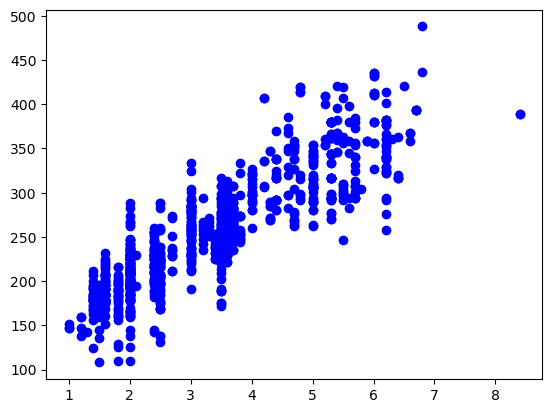

In [16]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')

(0.0, 507.0)

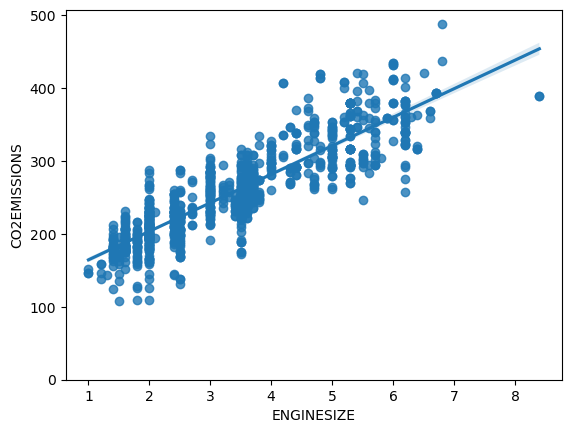

In [ ]:
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.ylim(0,)

see the coerelation between engine size and co2 emission

In [ ]:
person_coef, p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", person_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8741543683958123  with a P-value of P = 0.0


 see the relationship between cylinders and co2 emissions  and visualize it

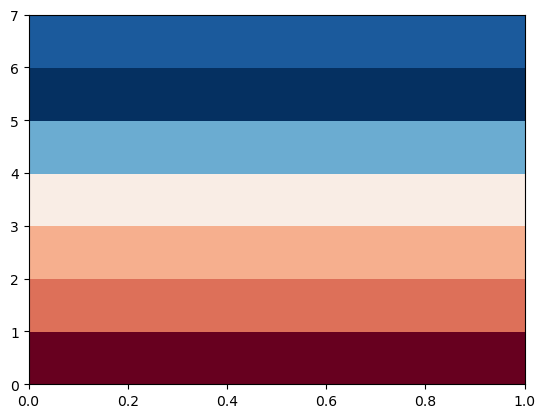

In [ ]:
# see the relationship between cylinders and co2 emissions 
df_test  = df[['CYLINDERS',  'CO2EMISSIONS']]
df_grp = df_test.groupby(['CYLINDERS'] ).mean()
plt.pcolor(df_grp , cmap='RdBu')


(0.0, 507.0)

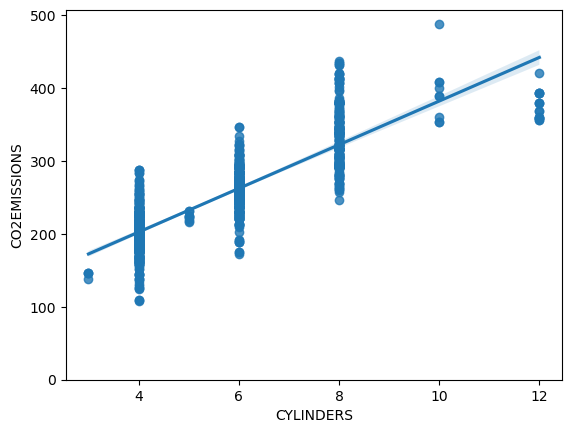

In [ ]:
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', data=df)
plt.ylim(0,)

see the coerelation between cylinders and co2emission

In [ ]:
person_coef, p_value = stats.pearsonr(df['CYLINDERS'], df['CO2EMISSIONS'])
print("The Pearson Correlation Coefficient is", person_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8496845920141144  with a P-value of P = 2.770937203987512e-298
